### 1. Pacotes

Iniciando o projeto de análise exploratória de dados, carregaremos os pacotes necessários:

In [1]:
# Carregando os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Base de dados

Prosseguindo, carregaremos a base de dados _receitas.json_ e buscaremos entender as informações contidas na mesma.

In [2]:
# Importando a base de dados

data = pd.read_json('receitas.json')
print(data.shape)
data.head()

(20130, 11)


,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


Como exibido, a base de dados é composta por 11 colunas e 20.130 linhas, cada uma com informações a cerca de uma receita, como calorias, proteina, e ingredientes. Como exibido, existem valores NaN, a seguir poderemos ver quantos valores nulos existem em cada coluna, junto com o seu tipo de dado:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


Como não é explicitado, verificaremos se as colunas _fat_, _calories_, _protein_ e _sodium_ correspondem à valores percentuais (%). Também analisaremos a coluna _rating_ e para isso, verificaremos indicadores estatísticos de cada coluna numérica.

In [4]:
data.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


Dado que os valores máximos de _fat_, _calories_, _proteing_ e _sodium_ possuem um valor máximo acima de 100, podemos concluir que as colunas não se tratam de valores percentuais. Podemos verificar também que a coluna _rating_ possui um valor mínimo de 0 e um valor máximo de 5. Após entender o conteúdo das colunas numéricas, voltaremos a atenção para a análise dos valores NaN.

In [5]:
data.isna().any()

directions     True
fat            True
date           True
categories     True
calories       True
desc           True
protein        True
rating         True
title          True
ingredients    True
sodium         True
dtype: bool

In [6]:
data[data.isna().any(axis=1)]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
6,[Cook potatoes and carrots in large pot of boi...,NaN,2004-08-20 04:00:00+00:00,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",NaN,Serve this newfangled main-course salad with a...,NaN,4.375,Ham and Spring Vegetable Salad with Shallot Vi...,"[1 1/2 pounds small red-skinned potatoes, each...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
20120,"[Bring all ingredients to a simmer, covered di...",NaN,2006-05-16 20:12:06+00:00,"[Food Processor, Fruit, Side, Vegetarian, Date...",NaN,This recipe is an accompaniment for Rack of La...,NaN,2.500,Date Purée,"[3 cups pitted dates (14 ounces), 1 (750-ml) b...",NaN
20122,[Mix first 4 ingredients in large pitcher. Cov...,0.0,2004-08-20 20:58:12+00:00,"[Fruit Juice, Liqueur, Vodka, Alcoholic, Cockt...",84.0,None,0.0,3.750,Orange-Tini,"[4 cups water, 1 750-ml bottle vodka (about 3 ...",5.0
20124,[Wash spareribs. Remove excess fat and gristle...,80.0,2004-08-20 04:00:00+00:00,"[Pork, Appetizer, Bake, Marinate, Sherry, Fall...",998.0,None,55.0,3.750,Chinese Barbecued Spareribs,"[1 side pork spareribs, about 3 pounds, 1/2 cu...",2027.0
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0


Como visto, há valores NaN em todas as colunas e 9522 linhas com, pelo menos, 1 valor NaN. Poderíamos substituir os valores NaN pela média ou mediana, porém para não atrapalhar a análise, iremos excluir as observações com NaN.

In [7]:
nan_data = data[data.isna().any(axis=1)]
x = nan_data.index

In [8]:
data_l = data.drop(x)

In [9]:
data_l['rating'] = data_l['rating'].astype(int)
data_l['fat'] = data_l['fat'].astype(int)
data_l['calories'] = data_l['calories'].astype(int)
data_l['protein'] = data_l['protein'].astype(int)
data_l['sodium'] = data_l['sodium'].astype(int)

### 3. AED

A seguir, iremos realizar uma breve análise exploratória de dados (AED) para buscar tendências e insights:

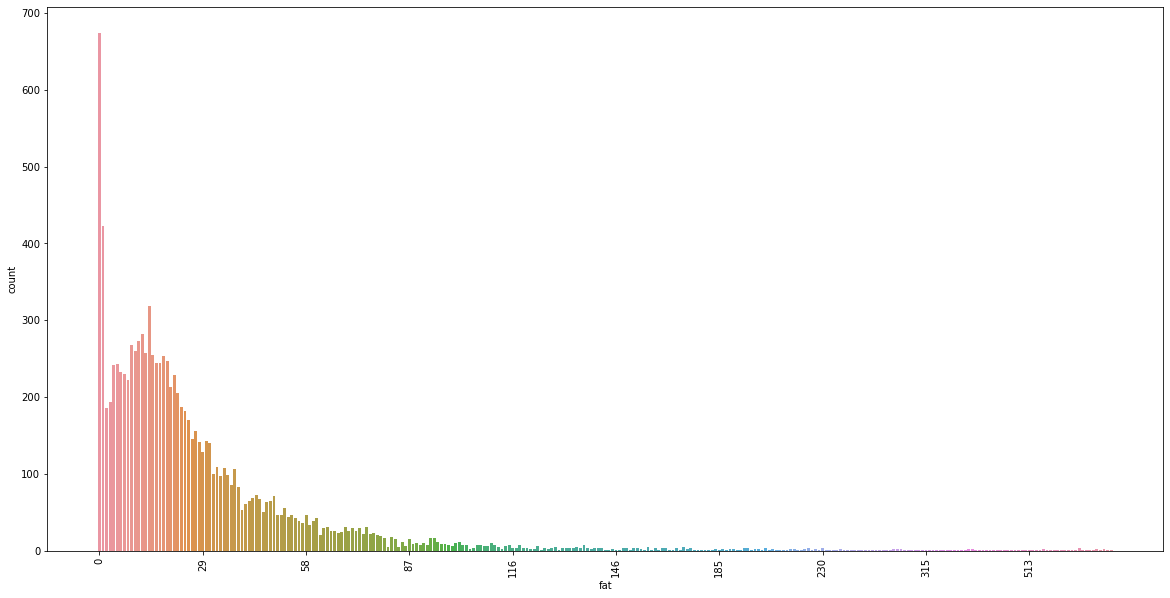

In [10]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='fat', data=data_l)
plt.locator_params(nbins=10)
plt.xticks(rotation=90);

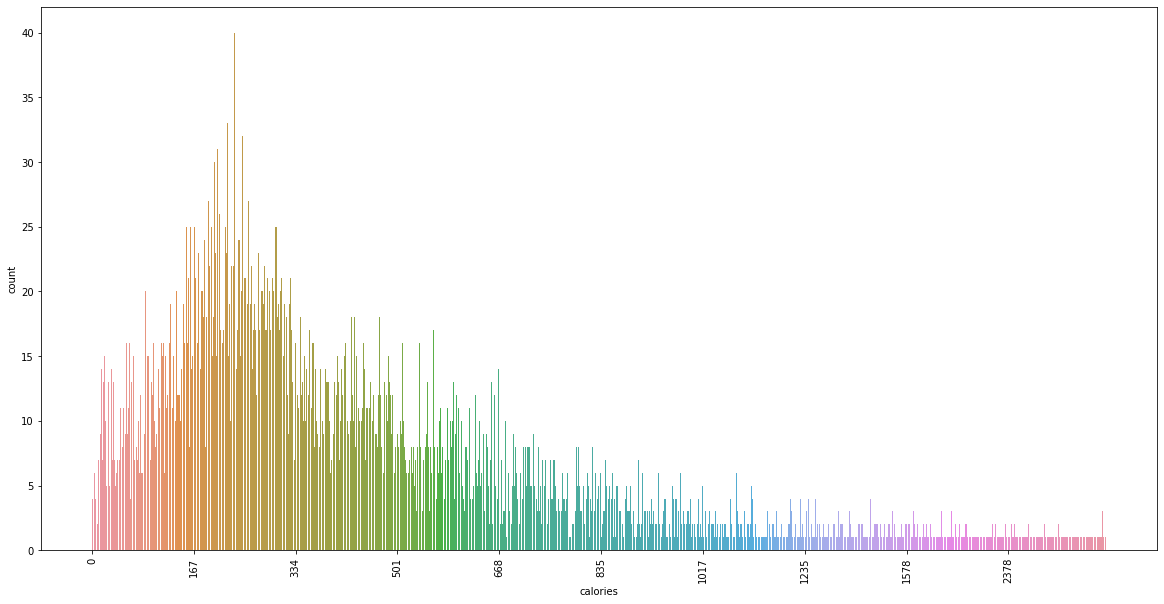

In [11]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='calories', data=data_l)
plt.locator_params(nbins=10)
plt.xticks(rotation=90);

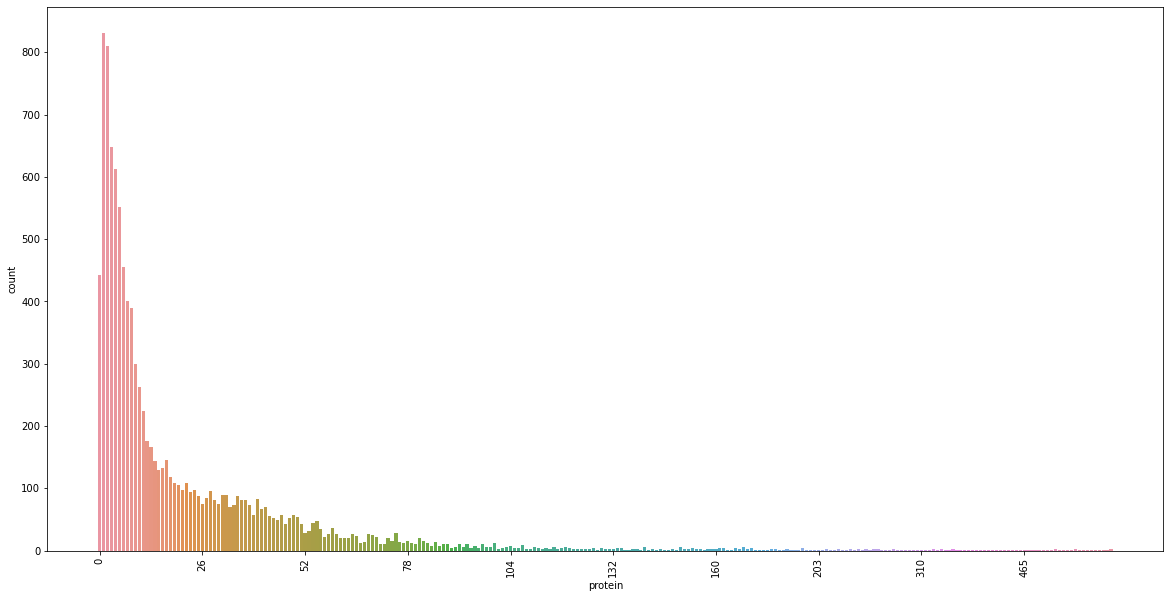

In [12]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='protein', data=data_l)
plt.locator_params(nbins=10)
plt.xticks(rotation=90);

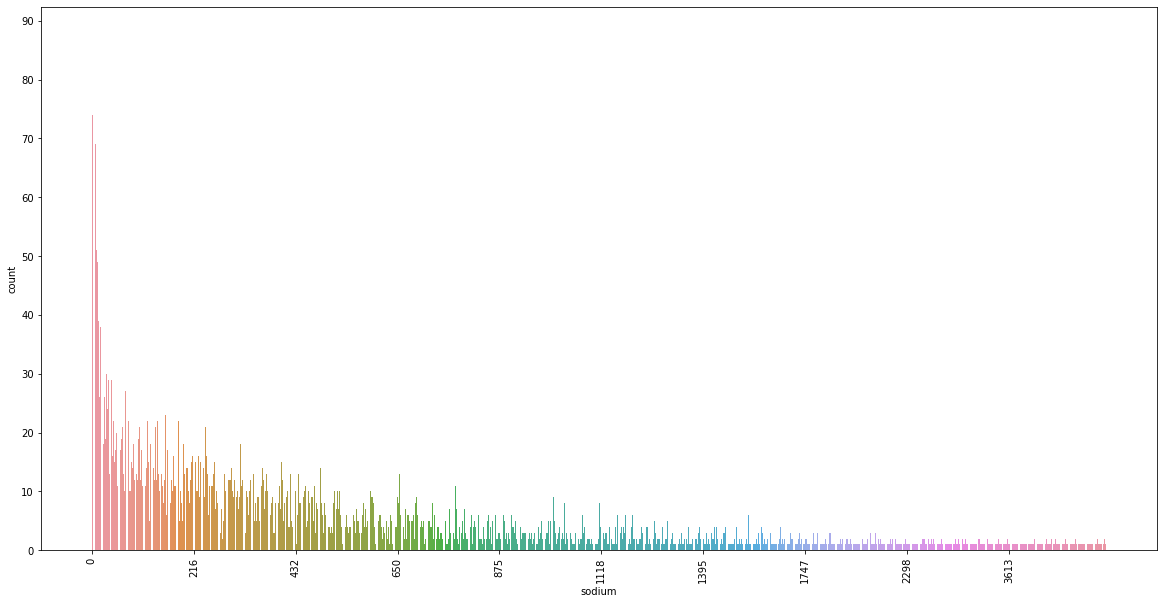

In [13]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='sodium', data=data_l)
plt.locator_params(nbins=10)
plt.xticks(rotation=90);

Pelos gráficos apresentados acima, pode-se notar que, apesar de valores extremos para cada uma das variáveis, a maior parte das receitas costumam conter baixos níveis gordura, sódio, proteina e calorias, o que pode indicar uma maior presença de receitas saudáveis na base de dados.

<Figure size 1440x720 with 0 Axes>

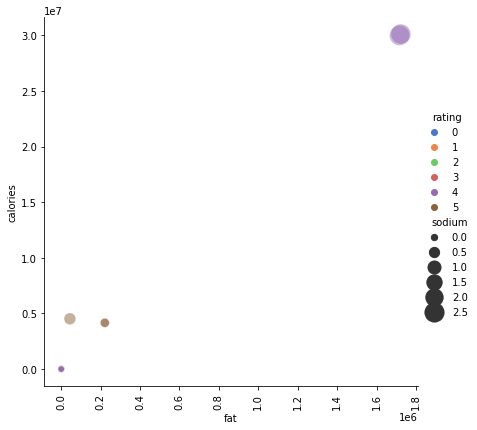

In [14]:
fig = plt.figure(figsize=(20,10))
sns.relplot(x="fat", y="calories", hue="rating", size="sodium",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_l)
plt.locator_params(nbins=10)
plt.xticks(rotation=90);

Pode-se notar também que há uma correlação positiva entre os níveis de gordura, calorias e sódio, alem de que as receitas que possuem um maior nível desses três fatores obtiveram altos valores de _rating_.

Futuras análises podem prover mais insights com um melhor desenvolvimento da base de dados, podendo desagregar as variáveis _ingredients_, _directions_ e _categories_ para analisar quais os ingredientes mais utilizados ao longo do tempo, quais as categorias com o maior número de receitas, quais os métodos de culinária mais predominantes, correlações entre os ingredientes e as variáveis _fat_, _calories_, _protein_ e _sodium_, assim, gerando um melhor entendimento dos dados fornecidos.